In [7]:

import pandas as pd
import itertools 
import numpy as np
import matplotlib.pyplot as plt
from sklearn import preprocessing
%matplotlib inline
import seaborn as sns

In [8]:

liver_data_train = pd.read_csv('D:\p\Indian_Liver_Patients_Dataset.csv')
liver_data_train.head()

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset
0,65,Female,0.7,0.1,187,16,18,6.8,3.3,0.90,1
1,62,Male,10.9,5.5,699,64,100,7.5,3.2,0.74,1
2,62,Male,7.3,4.1,490,60,68,7.0,3.3,0.89,1
3,58,Male,1.0,0.4,182,14,20,6.8,3.4,1.00,1
4,72,Male,3.9,2.0,195,27,59,7.3,2.4,0.40,1


In [9]:
liver_data_train.shape

(583, 11)

In [10]:
def label_disease(liver_data_train):
    if liver_data_train["Dataset"] == 1:
        return 'yes'
    return 'no'

liver_data_train['HasDisease'] = liver_data_train.apply(lambda liver_data_train: label_disease(liver_data_train), axis=1)

In [11]:
liver_data_train['HasDisease'].value_counts()

yes    416
no     167
Name: HasDisease, dtype: int64

In [28]:
liver_data_train['Gender'].replace(to_replace=['Male','Female'], value=[0,1],inplace=True)

<Axes: >

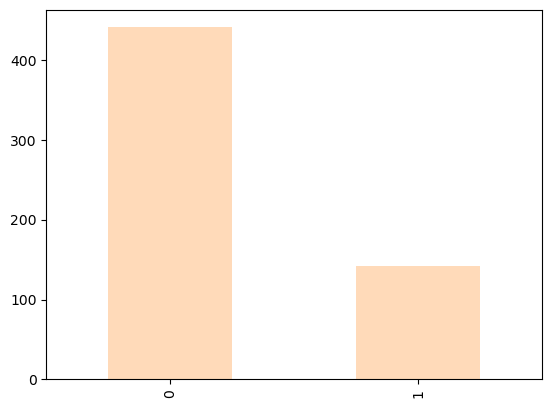

In [29]:
liver_data_train['Gender'].value_counts().plot.bar(color='peachpuff')

<Axes: >

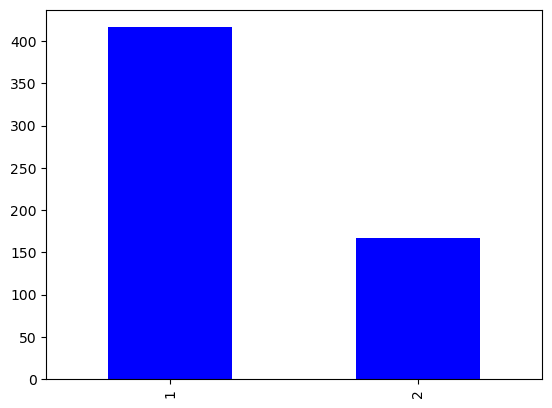

In [30]:
liver_data_train['Dataset'].value_counts().plot.bar(color='blue')

In [31]:
liver_data_train.isna().sum()

Age                           0
Gender                        0
Total_Bilirubin               0
Direct_Bilirubin              0
Alkaline_Phosphotase          0
Alamine_Aminotransferase      0
Aspartate_Aminotransferase    0
Total_Protiens                0
Albumin                       0
Albumin_and_Globulin_Ratio    4
Dataset                       0
HasDisease                    0
dtype: int64

In [32]:
liver_data_train['Albumin_and_Globulin_Ratio'].fillna((liver_data_train['Albumin_and_Globulin_Ratio'].mean()), inplace=True)

In [33]:
liver_data_train.isna().sum()

Age                           0
Gender                        0
Total_Bilirubin               0
Direct_Bilirubin              0
Alkaline_Phosphotase          0
Alamine_Aminotransferase      0
Aspartate_Aminotransferase    0
Total_Protiens                0
Albumin                       0
Albumin_and_Globulin_Ratio    0
Dataset                       0
HasDisease                    0
dtype: int64

<Axes: >

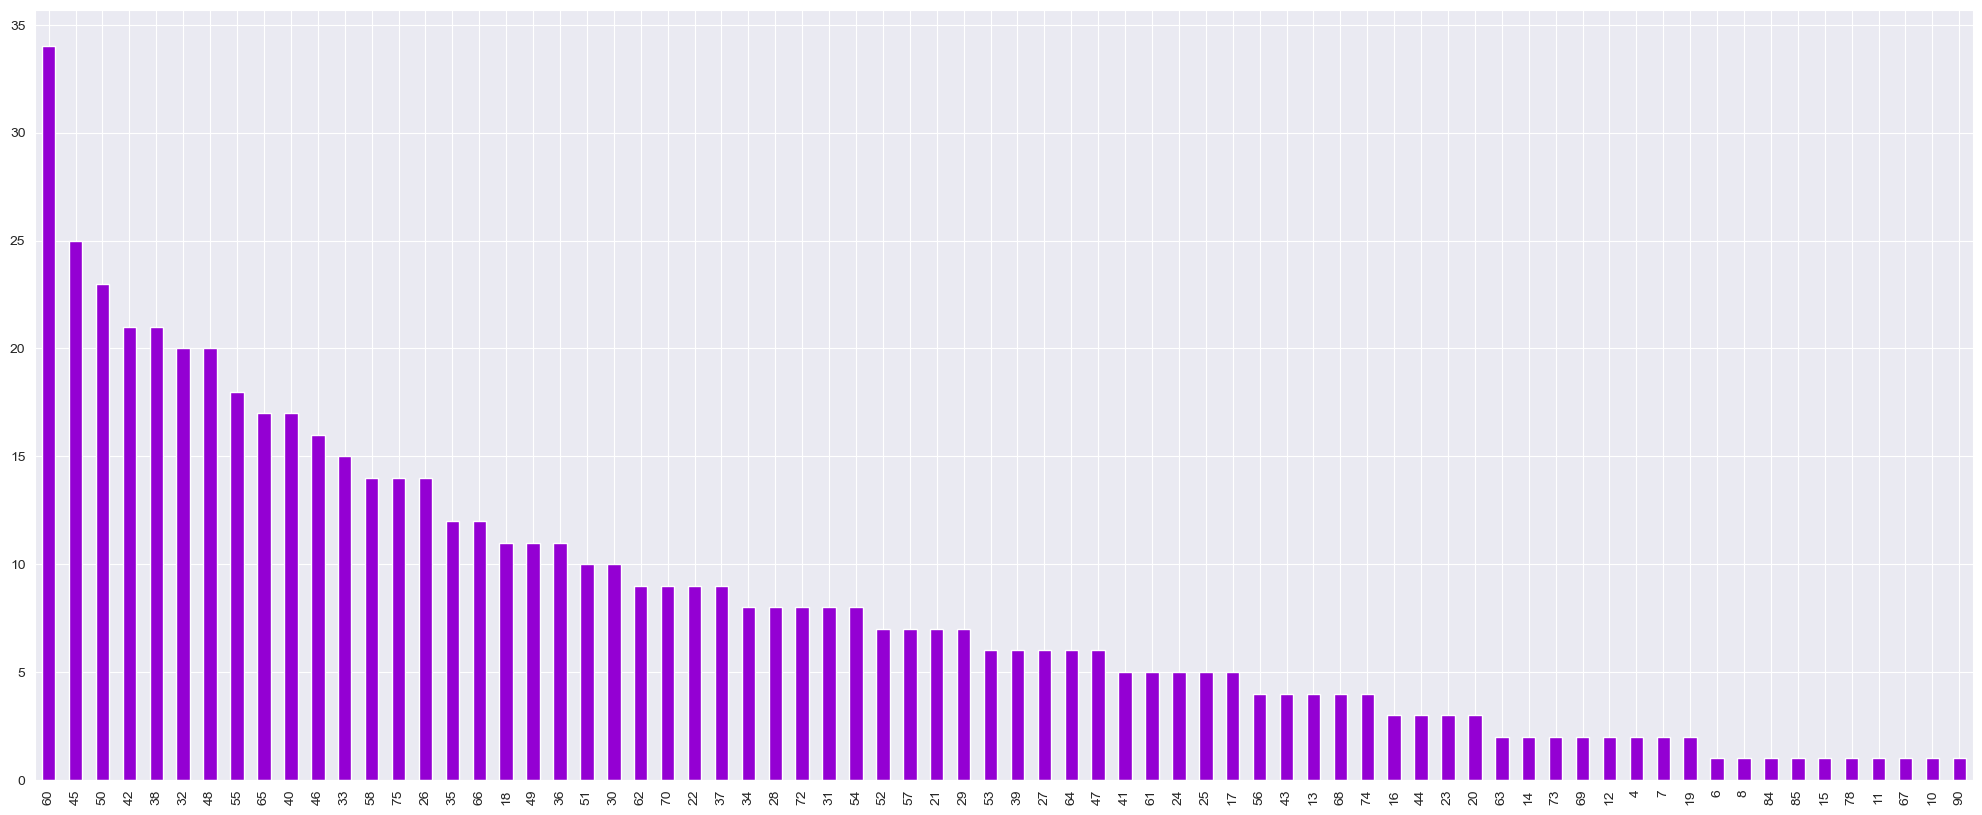

In [34]:
sns.set_style('darkgrid')
plt.figure(figsize=(25,10))
liver_data_train['Age'].value_counts().plot.bar(color='darkviolet')

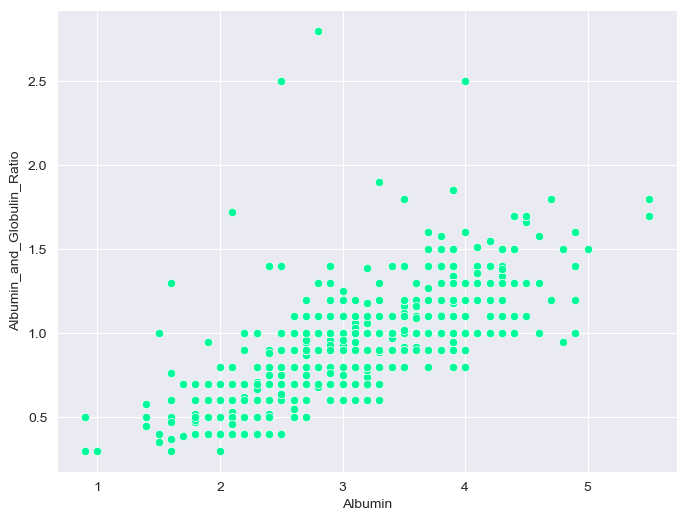

In [39]:
f, ax = plt.subplots(figsize=(8, 6))
sns.scatterplot(x="Albumin", y="Albumin_and_Globulin_Ratio",color='mediumspringgreen',data=liver_data_train);
plt.show()

In [35]:
Feature = liver_data_train[['Age','Gender','Total_Bilirubin','Direct_Bilirubin',
                      'Alkaline_Phosphotase','Alamine_Aminotransferase','Aspartate_Aminotransferase',
                      'Total_Protiens','Albumin','Albumin_and_Globulin_Ratio']]

In [36]:
X = Feature
y = liver_data_train['HasDisease'].values
y[0:5]

array(['yes', 'yes', 'yes', 'yes', 'yes'], dtype=object)

In [37]:
X= preprocessing.StandardScaler().fit(X).transform(X)
X[0:5]

array([[ 1.25209764,  1.76228085, -0.41887783, -0.49396398, -0.42671496,
        -0.35466541, -0.31839333,  0.29211961,  0.19896867, -0.14789798],
       [ 1.06663704, -0.56744644,  1.22517135,  1.43042334,  1.68262856,
        -0.09159933, -0.03433257,  0.93756634,  0.07315659, -0.65069686],
       [ 1.06663704, -0.56744644,  0.6449187 ,  0.93150811,  0.82158795,
        -0.11352151, -0.14518555,  0.47653296,  0.19896867, -0.17932291],
       [ 0.81935624, -0.56744644, -0.37052344, -0.38705357, -0.44731402,
        -0.36562649, -0.31146502,  0.29211961,  0.32478075,  0.16635131],
       [ 1.68483904, -0.56744644,  0.0969023 ,  0.18313526, -0.39375647,
        -0.29437943, -0.17636295,  0.75315299, -0.93334003, -1.71914446]])

In [38]:
from sklearn.model_selection import train_test_split
X_trainset, X_testset, y_trainset, y_testset = train_test_split(X, y, test_size=0.2, random_state=5)

In [14]:
from sklearn.linear_model import LogisticRegression
LogReg = LogisticRegression(C=0.01, solver='liblinear').fit(X_trainset,y_trainset)
LogReg

LogisticRegression(C=0.01, solver='liblinear')

In [15]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.2, random_state=4)
print('Train Set:',X_train.shape, y_train.shape)
print('Test Set:',X_test.shape, y_test.shape)

Train Set: (466, 10) (466,)
Test Set: (117, 10) (117,)


In [16]:
LogReg_yhat = LogReg.predict(X_test)
LogReg_yhat[0:49]

array(['yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'no', 'yes',
       'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'no',
       'yes', 'yes', 'yes', 'yes', 'no', 'yes', 'yes', 'no', 'yes', 'yes',
       'yes', 'no', 'no', 'yes', 'yes', 'no', 'yes', 'yes', 'yes', 'yes',
       'yes', 'yes', 'yes', 'no', 'yes', 'yes', 'yes', 'no', 'yes', 'yes',
       'yes'], dtype=object)

In [17]:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, LogReg_yhat)
print(confusion_matrix)

[[12 25]
 [ 6 74]]


In [18]:
from sklearn.metrics import classification_report
print(classification_report(y_test, LogReg_yhat))

              precision    recall  f1-score   support

          no       0.67      0.32      0.44        37
         yes       0.75      0.93      0.83        80

    accuracy                           0.74       117
   macro avg       0.71      0.62      0.63       117
weighted avg       0.72      0.74      0.70       117

